In [3]:
import os
if not os.path.exists("constants.py"):
    os.chdir("..")
from constants import *
from utils_segment_image import *
from utils_segment_whole_slide import *
from segmentation_service import process_ndpi_segmentation_request
import os

In [ ]:
import openslide
import json


ndpi_files = [s for s in os.listdir(INPUT_TILES_PATH) if s.endswith(".ndpi") and not s in os.listdir(OUTPUT_TILES_PATH)]
print("Found NDPI files:", ndpi_files)
results = []
for ndpi_file in ndpi_files:
    slide = openslide.OpenSlide(os.path.join(INPUT_TILES_PATH, ndpi_file))
    result = process_ndpi_segmentation_request(slide=slide, output_tiles_path=os.path.join(OUTPUT_TILES_PATH, ndpi_file))
    # Save the result to {OUTPUT_TILES_PATH}/{ndpi_file}/output_stats.json
    output_stats_path = os.path.join(OUTPUT_TILES_PATH, ndpi_file, OUTPUT_STATS_FILENAME)
    os.makedirs(os.path.dirname(output_stats_path), exist_ok=True)
    with open(output_stats_path, 'w') as f:
        json.dump(result, f)
    logging.info(f"Output stats saved to: {output_stats_path}")
    
    results.append({ndpi_file: result})
    slide.close()


FileNotFoundError: [Errno 2] No such file or directory: '~/Downloads/ndpi_files'

In [ ]:
results

[{'Grade 2_BPC-20-MK-3289 BA19-00103 A2 - 2024-12-03 11.59.16.ndpi': {'total_nuclei_count': 593724,
   'total_non_background_area_mm2': 296.96943988347823}},
 {"02_D24-012814 C1-1 Level 1, 2, 3' - 2024-06-20 15.47.36_Mucosa_Grade 2B.ndpi": {'total_nuclei_count': 147701,
   'total_non_background_area_mm2': 24.933693403131443}},
 {'04_skin D23-031729 C1-1 - 2024-02-22 15.26.23_Skin 3A.ndpi': {'total_nuclei_count': 24748,
   'total_non_background_area_mm2': 4.289943900397117}},
 {'03_D24-018959 A1-1 H&E - 2024-06-20 14.33.29_Skin_Banff 0.ndpi': {'total_nuclei_count': 64758,
   'total_non_background_area_mm2': 24.760297467037553}},
 {'03_clavicle D22-004650 A1-1 - 2024-02-22 15.32.25_Skin_Banff_0-1.ndpi': {'total_nuclei_count': 19269,
   'total_non_background_area_mm2': 7.250518957407701}},
 {'02_skin D23-035694 A1-1 - 2024-02-22 15.12.49_Skin_Banff 3A.ndpi': {'total_nuclei_count': 26337,
   'total_non_background_area_mm2': 5.465183022811297}},
 {'06_unspecified D23-036777 C1-1 - 2024-02-2

In [ ]:
for i, result in enumerate(results):
    ndpi_file = list(result.keys())[0]
    print(f"Slide {i+1}: {ndpi_file}")
    print(f"  Total Nuclei Count: {result[ndpi_file]['total_nuclei_count']}")
    print(f"  Total Non-background Area (mm²): {result[ndpi_file]['total_non_background_area_mm2']:.2f}")
    print(f"  Density (Nuclei/mm²): {result[ndpi_file]['total_nuclei_count'] / result[ndpi_file]['total_non_background_area_mm2']:.2f}")
    print()

Slide 1: Grade 2_BPC-20-MK-3289 BA19-00103 A2 - 2024-12-03 11.59.16.ndpi
  Total Nuclei Count: 593724
  Total Non-background Area (mm²): 296.97
  Density (Nuclei/mm²): 1999.28

Slide 2: 02_D24-012814 C1-1 Level 1, 2, 3' - 2024-06-20 15.47.36_Mucosa_Grade 2B.ndpi
  Total Nuclei Count: 147701
  Total Non-background Area (mm²): 24.93
  Density (Nuclei/mm²): 5923.75

Slide 3: 04_skin D23-031729 C1-1 - 2024-02-22 15.26.23_Skin 3A.ndpi
  Total Nuclei Count: 24748
  Total Non-background Area (mm²): 4.29
  Density (Nuclei/mm²): 5768.84

Slide 4: 03_D24-018959 A1-1 H&E - 2024-06-20 14.33.29_Skin_Banff 0.ndpi
  Total Nuclei Count: 64758
  Total Non-background Area (mm²): 24.76
  Density (Nuclei/mm²): 2615.40

Slide 5: 03_clavicle D22-004650 A1-1 - 2024-02-22 15.32.25_Skin_Banff_0-1.ndpi
  Total Nuclei Count: 19269
  Total Non-background Area (mm²): 7.25
  Density (Nuclei/mm²): 2657.60

Slide 6: 02_skin D23-035694 A1-1 - 2024-02-22 15.12.49_Skin_Banff 3A.ndpi
  Total Nuclei Count: 26337
  Total N

Output stats saved to: ./output_tiles/output_stats.csv
                                            ndpi_file  total_nuclei_count  \
0   01_D23-044303 A1-1 H&E - 2024-06-20 13.49.00_M...              171498   
1   04_mucosa D23-031729 A1-1 - 2024-02-22 15.23.1...               31254   
2   Grade 3_BPC-20-MK-3289 BS-19-G55249 C1 - 2024-...               25025   
3   05_face D22-037504 A1-1 - 2024-02-22 15.27.39_...               34494   
4   03_mucosa D23-003558 D1-1 - 2024-02-22 15.40.3...                3159   
5   07_D24-021873 A1-1 Level 1, 2, 3' - 2024-06-20...              139488   
6   05_skin D23-035693 A1-1 - 2024-02-22 15.29.36_...               57751   
7      02_-3-Mucosa Allograft 03_17_25_Banff 0-1.ndpi               68070   
8   01_upper lip D23-048980 A1-1 - 2024-02-22 15.2...               40548   
9   03_mucosa D23-003558 C1-1 - 2024-02-22 15.39.3...                6918   
10                    01_01_07_25_MUCOSA_Banff 2.ndpi               32976   
11  04_skin D23-03172

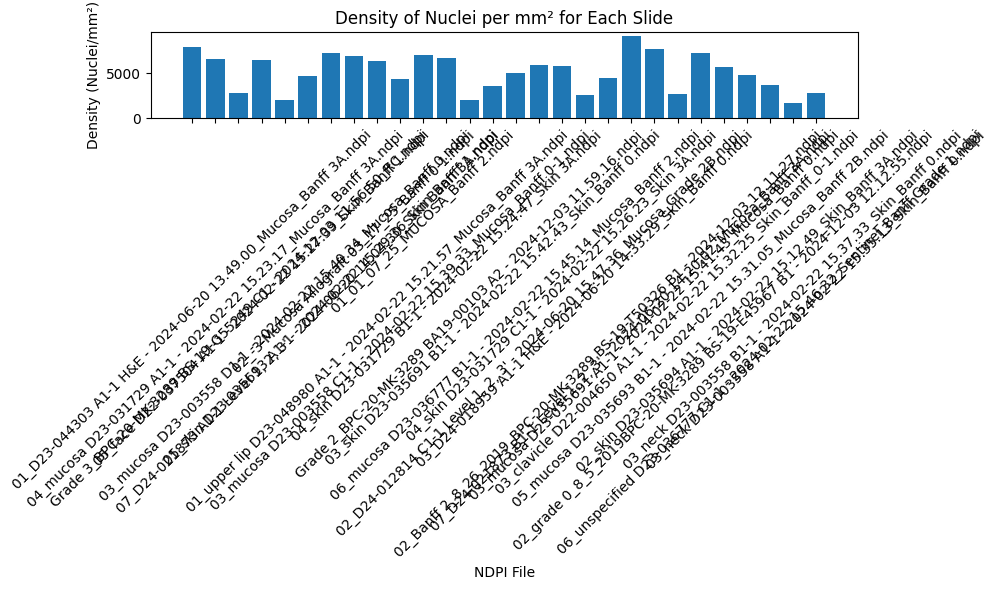

In [ ]:
directories = os.listdir(OUTPUT_TILES_PATH)
# make a csv based on the json output_stats.json in each directory.
# Each json file (output_stats.json) contains:
# {
#     "total_nuclei_count": 123,
#     "total_non_background_area_mm2": 456.78
# }
# Each directory is named after the ndpi file.
# The csv should have the following columns:
# ndpi_file,total_nuclei_count,total_non_background_area_mm2,density
import pandas as pd
import json
import os
import csv
import glob
import numpy as np

# Create a list to hold the data
data = []
# Iterate through each directory in the OUTPUT_TILES_PATH
for directory in directories:
    # Construct the path to the output_stats.json file
    json_file_path = os.path.join(OUTPUT_TILES_PATH, directory, OUTPUT_STATS_FILENAME)
    # Check if the file exists
    if os.path.exists(json_file_path):
        # Open and read the JSON file
        with open(json_file_path, 'r') as f:
            stats = json.load(f)
        # Append the data to the list
        data.append({
            'ndpi_file': directory,
            'total_nuclei_count': stats['total_nuclei_count'],
            'total_non_background_area_mm2': stats['total_non_background_area_mm2'],
            'density': stats['total_nuclei_count'] / stats['total_non_background_area_mm2']
        })
# Create a DataFrame from the list
df = pd.DataFrame(data)
# Save the DataFrame to a CSV file
output_csv_path = os.path.join(OUTPUT_TILES_PATH, "output_stats.csv")
df = df.sort_values(by='ndpi_file')
df.to_csv(output_csv_path, index=False)
print(f"Output stats saved to: {output_csv_path}")
# Read the CSV file and print its contents
df = pd.read_csv(output_csv_path)
print(df)
# Plot the density of nuclei per mm² for each slide
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['ndpi_file'], df['density'])
plt.xlabel('NDPI File')
plt.ylabel('Density (Nuclei/mm²)')
plt.title('Density of Nuclei per mm² for Each Slide')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()